Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [144]:
#Ваш код здесь
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

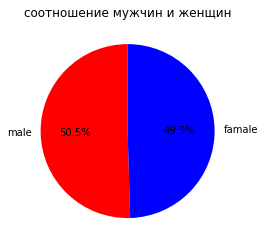

In [145]:
labels = ['male','famale']
values = [df.gender.value_counts()[0],df.gender.value_counts()[1]]
colors = ['red','blue']
plt.title('соотношение мужчин и женщин')
plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90)
# plt.axis('equal')
plt.show()

##### 2. Какое количество уникальных значений у поля InternetService?

In [146]:
#Ваш код здесь
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [147]:
#Ваш код здесь
df['TotalCharges']
# print(df['TotalCharges'].median())
# print(df['TotalCharges'].mean())
# print(df['TotalCharges'].std())

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [148]:
# df['TotalCharges'].dtypes()

Тип данных dtype: object
вылезает ошибка.

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [149]:
#Ваш код здесь
#df.loc[(df.PhoneService == 'Yes'), 'PhoneService'] = 1
#df.loc[(df.PhoneService == 'No'), 'PhoneService'] = 0
words_to_numbers = {"Yes": 1, "No": 0,}
df['PhoneService'] = df['PhoneService'].replace(words_to_numbers)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [150]:
#Ваш код здесь
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [151]:
#df['TotalCharges'].astype(float32)
df.sort_values('TotalCharges', ascending=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2845,9093-FPDLG,Female,0,No,No,11,1,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.20,999.9,No
3353,4536-PLEQY,Male,0,Yes,No,12,1,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.05,999.8,No
3686,5899-MQZZL,Female,0,No,No,13,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.00,999.45,Yes
5598,6051-PTVNS,Female,0,Yes,Yes,55,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.15,998.1,No
6646,8249-THVEC,Male,0,Yes,Yes,51,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,5709-LVOEQ,Female,0,Yes,Yes,0,1,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
753,3115-CZMZD,Male,0,No,Yes,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,0,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No


In [152]:
# df['TotalCharges'].replace('', np.nan)
# df['TotalCharges'].replace(' ', np.nan)
type(df['TotalCharges'][6754])

str

In [153]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [154]:
df['TotalCharges'][6754]

nan

In [155]:
df.sort_values('TotalCharges', ascending=False)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2845,9093-FPDLG,Female,0,No,No,11,1,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.20,999.9,No
3353,4536-PLEQY,Male,0,Yes,No,12,1,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.05,999.8,No
3686,5899-MQZZL,Female,0,No,No,13,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.00,999.45,Yes
5598,6051-PTVNS,Female,0,Yes,Yes,55,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.15,998.1,No
6646,8249-THVEC,Male,0,Yes,Yes,51,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,3213-VVOLG,Male,0,Yes,Yes,0,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,1,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [156]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [157]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [158]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [159]:
print(df['TotalCharges'].median())
print(df['TotalCharges'].mean())
print(df['TotalCharges'].std())

1394.55
2279.734303563826
2266.7944696890195


##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [160]:
#Ваш код здесь
df['Churn'] = df['Churn'].replace(words_to_numbers)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [161]:
#Ваш код здесь
words_to_numbers = {"Yes": 1, "No": 0, "No internet service": 0}
df['StreamingMovies'] = df['StreamingMovies'].replace(words_to_numbers)
df['StreamingTV'] = df['StreamingTV'].replace(words_to_numbers)
df['TechSupport'] = df['TechSupport'].replace(words_to_numbers)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,No,...,No,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,Yes,...,Yes,0,0,0,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,Yes,...,No,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,0,No phone service,DSL,Yes,...,Yes,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,1,No,Fiber optic,No,...,No,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,1,Yes,DSL,Yes,...,Yes,1,1,1,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,1,Yes,Fiber optic,No,...,Yes,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,0,No phone service,DSL,Yes,...,No,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,1,Yes,Fiber optic,No,...,No,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.60,1


##### 8. Заполните пропуски в поле PhoneService значением 0

In [162]:
#Ваш код здесь
# df.sort_values('PhoneService', ascending=False)
df['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [163]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']
#Ваш код здесь
df = df[columns]
df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.85,0,0,0,0
1,Male,34,1,1889.50,0,0,0,0
2,Male,2,1,108.15,0,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [164]:
from sklearn.model_selection import train_test_split

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'
#Ваш код здесь
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [165]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [166]:
#Ваш код здесь
gender.fit_transform(X_train)

,gender_Female,gender_Male
2576,1,0
6642,0,1
5380,0,1
2517,0,1
2969,1,0
...,...,...
1768,1,0
1737,1,0
3240,1,0
5305,1,0


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [167]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

In [168]:
df

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.85,0,0,0,0
1,Male,34,1,1889.50,0,0,0,0
2,Male,2,1,108.15,0,0,0,1
3,Male,45,0,1840.75,0,0,1,0
4,Female,2,1,151.65,0,0,0,1
...,...,...,...,...,...,...,...,...
7038,Male,24,1,1990.50,1,1,1,0
7039,Female,72,1,7362.90,1,1,0,0
7040,Female,11,0,346.45,0,0,0,0
7041,Male,4,1,306.60,0,0,0,1


##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [169]:
#Ваш код здесь
total_charges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])

Объединение всех "кубиков" очень легко сделать таким образом

In [170]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [171]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', total_charges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [172]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [182]:
#Ваш код здесь
probability_of_classes = pipeline.predict_proba(X_test)
probability_of_classes

array([[0.82, 0.18],
       [0.99, 0.01],
       [0.99, 0.01],
       ...,
       [0.86, 0.14],
       [1.  , 0.  ],
       [0.33, 0.67]])

In [184]:
y_predicted = pipeline.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 1])

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [181]:
y_test

2905    0
6651    0
5321    0
4293    1
5686    1
       ..
2384    0
4426    0
2596    0
1746    0
2740    1
Name: Churn, Length: 2113, dtype: int64

In [185]:
from sklearn.metrics import roc_auc_score, log_loss

#Ваш код здесь
roc_auc_score(y_test, y_predicted)

0.6451321507984638

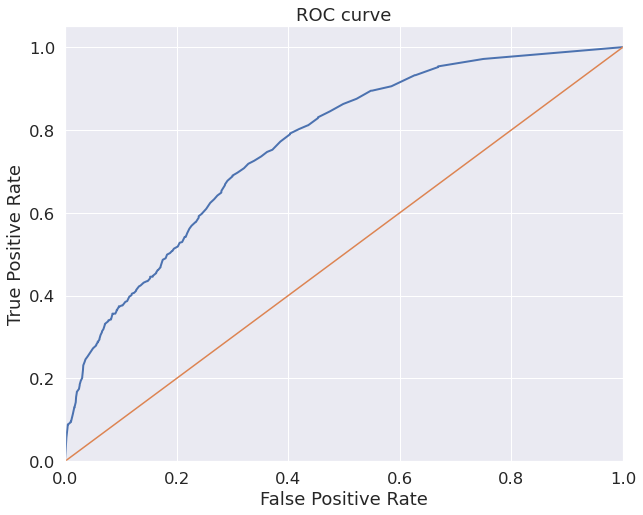

In [190]:
import seaborn as sns
from sklearn.metrics import roc_curve

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [186]:
log_loss(y_test, y_predicted)

8.794148988310063

### Сохраним наш пайплайн

In [188]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)